## Preprocessing

%pip install joblib==1.2.0
%pip install scikit-learn>=1.6.1
%pip install pandas==1.5.3
%pip install numpy>=1.25
%pip install matplotlib
%pip install seaborn
%pip install streamlit==1.42.2




%pip install setuptools
%pip install wheel


In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
import streamlit as st
import joblib
import setuptools
import wheel


In [61]:
df = pd.read_csv(r'C:\Users\probe\Documents\10_PROJETOS\Deployment\diabetes\data\diabetes_prediction_dataset.csv')

In [62]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [91]:
df['age'].value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

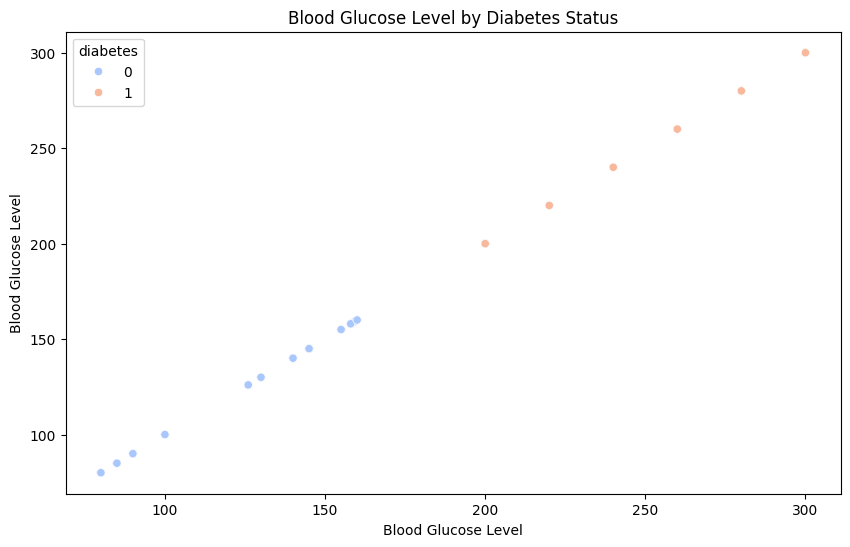

In [98]:
# Plotando um gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='blood_glucose_level', y='blood_glucose_level', hue='diabetes', palette='coolwarm')
plt.title('Blood Glucose Level by Diabetes Status')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Blood Glucose Level')
plt.show()

In [63]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

C:\Users\probe\AppData\Local\Temp\ipykernel_13364\1011111676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


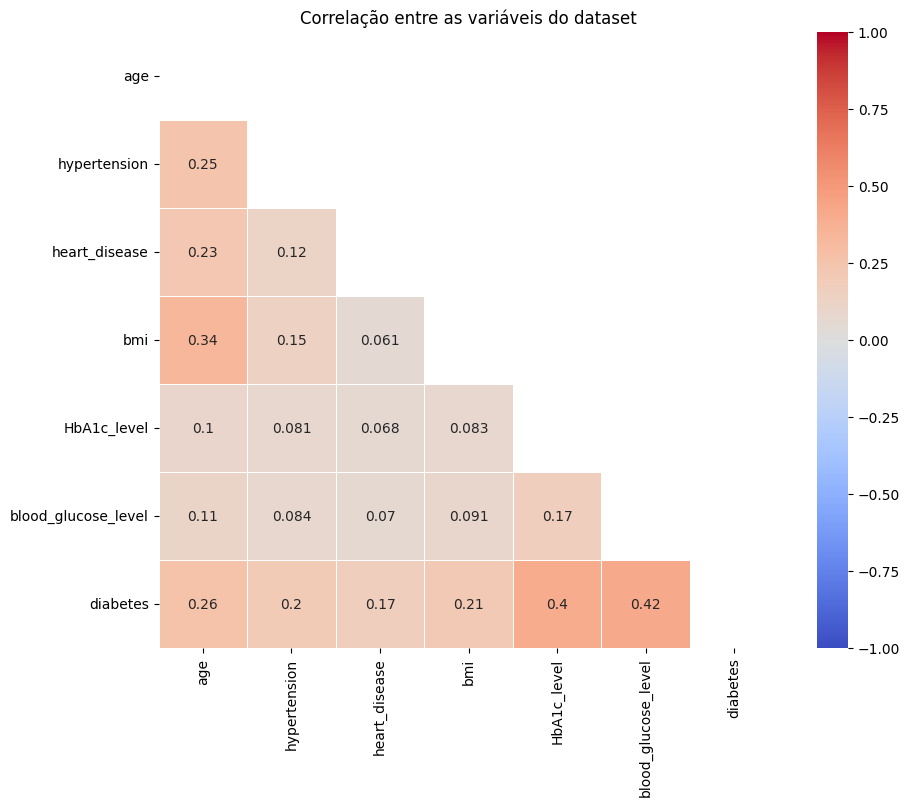

In [67]:
correlation = df.corr()

# Gerar uma máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))
plt.title('Correlação entre as variáveis do dataset')

# Gerar o heatmap com a máscara
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Exibir o plot
plt.show();

In [68]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [69]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [70]:
# Mapear 'Male' para 1 e 'Female' para 0 na coluna 'gender'
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
df['smoking_history'] = df['smoking_history'].map({'No Info': 1, 'never': 0, 'former': 2,
                                                    'current': 3, 'not current': 4, 'ever': 5})

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [72]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [73]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,1.281860,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.399055,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [74]:

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

from sklearn.metrics import classification_report, confusion_matrix


In [75]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [78]:
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler

In [79]:
# Crie uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e transforme os dados
X_scaled = scaler.fit_transform(X)


In [80]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 8), (20000, 8), (80000,), (20000,))

In [82]:
# Model training
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [83]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [86]:
# Get the best model
best_model = grid_search.best_estimator_

In [87]:
# Evaluate the model
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [88]:
# Cross-Validation Score
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.9722  0.97275 0.9694  0.97285 0.97185]
Mean Cross-Validation Score: 0.97181


In [89]:
# Salvar o modelo em um arquivo .pkl
joblib.dump(best_model, r'C:\Users\probe\Documents\10_PROJETOS\Deployment\diabetes\notebooks\dia_RF_model.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


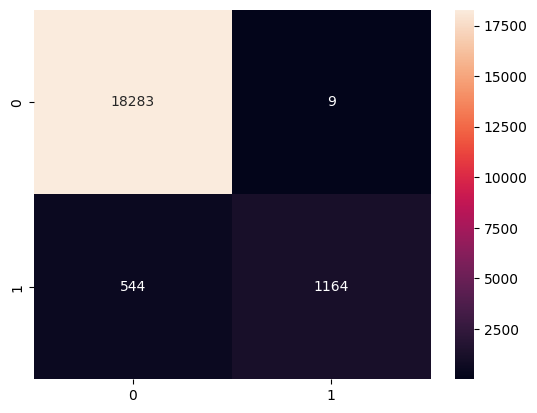

In [90]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()